<a href="https://colab.research.google.com/github/vishnubanna/UnlinkedProjects/blob/master/DeadPixelRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(X):
    #return np.tanh(X)
    return np.floor(1 / (1 + np.exp(-X)))

name = 'IMGtxt.txt'

imgtext = np.loadtxt(name)



In [0]:
print(imgtext)

[[ 0.000000e+00  0.000000e+00 -1.899745e+01]
 [ 0.000000e+00  1.000000e+00  7.326903e+02]
 [ 0.000000e+00  2.000000e+00  1.051574e+03]
 ...
 [ 1.199000e+03  1.597000e+03  1.819579e+03]
 [ 1.199000e+03  1.598000e+03  1.446722e+03]
 [ 1.199000e+03  1.599000e+03  3.586115e+02]]


good
612131.2
612131.2
[[-0.00791391  0.30522219  0.43806192 ...  0.43474638  0.79340074
   0.34209999]
 [ 0.1863528   0.0863689   0.46304448 ...  0.77907507  0.30984924
   0.59630217]
 [ 0.06967006  0.26483006  0.12415847 ...  0.13165115  0.86058967
   0.66914697]
 ...
 [ 0.7943847   0.9160757   1.22892321 ...  0.67922064  0.44993854
   0.26661322]
 [ 1.40461763  0.73011223  0.49068439 ...  0.81428835  0.84295679
   0.61270781]
 [ 0.46526651  0.69270983  0.45506578 ...  0.75799542  0.60267163
   0.14938943]]


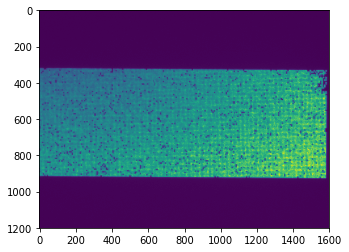

In [0]:
from math import *
img = np.empty((1200, 1600), dtype=np.float64)

for row in imgtext:
    img[int(floor(row[0]))][int(floor(row[1]))] = row[2]

print('good')
#img[img < 0] = 255
max = np.max(img)
#img[img == max] = 0
print(max)
max = np.max(img)
print(max)

img = 255 * (img/max)

plt.imshow(img)

print(img)

max = 255

0.0 255.0


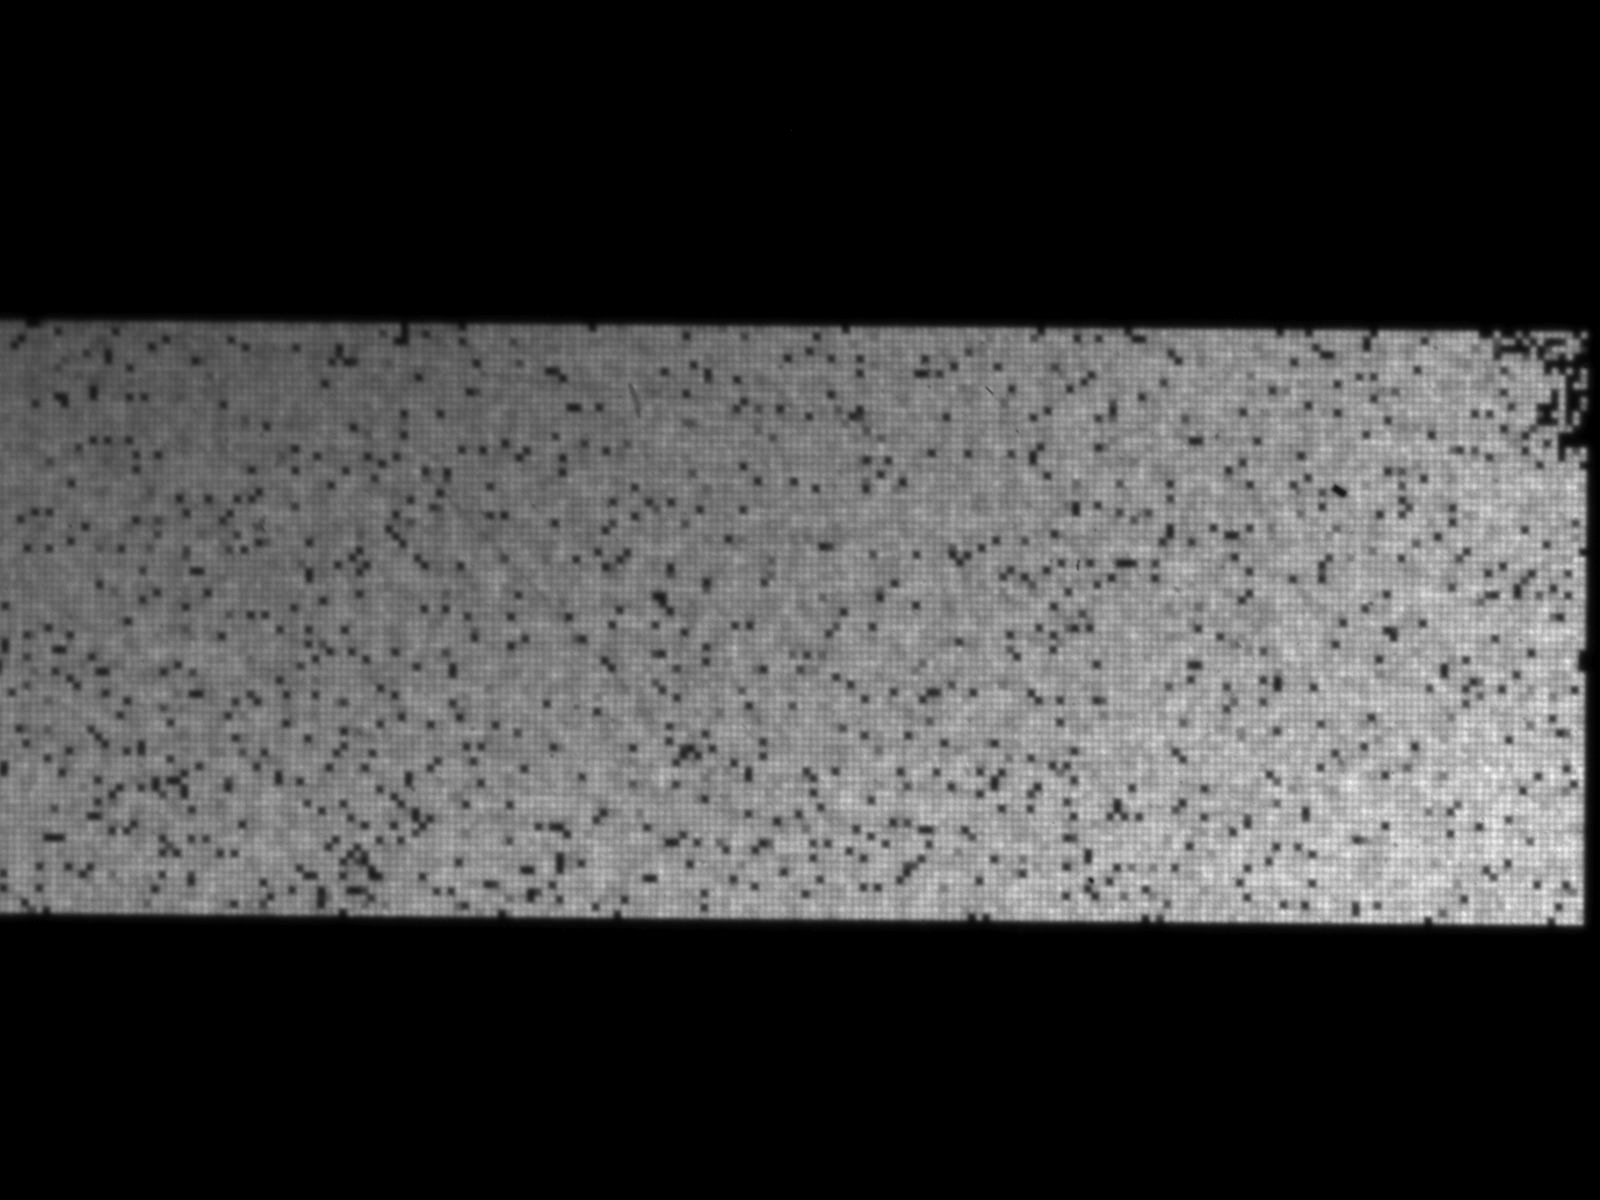

(1200, 1600)
(1198, 1598)


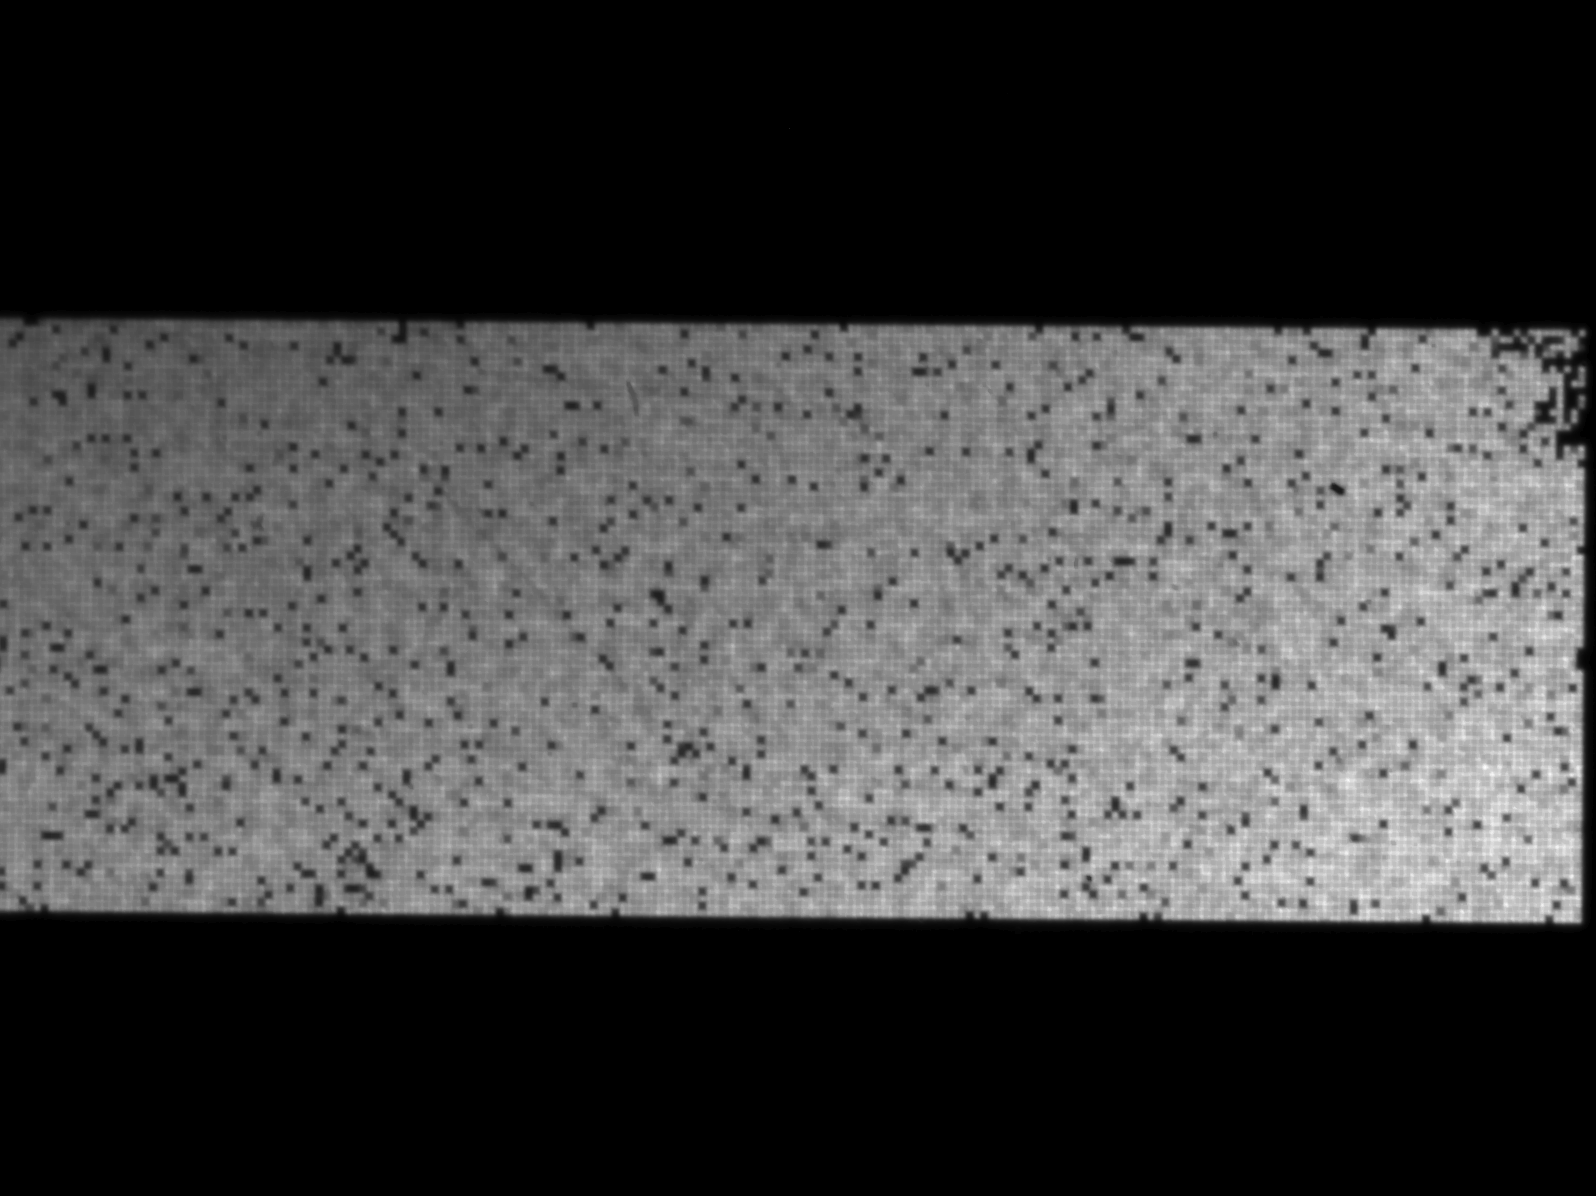

In [0]:
from google.colab.patches import cv2_imshow
from scipy.ndimage import filters
from skimage import feature
#cv2_imshow(img)

class maxPool2d():
    def __init__(self, filter_shape, stride):
        self.filter_shape = (filter_shape, filter_shape)
        self.stride = stride
        self.input = []
        pass

    def __call__(self, input):
        self.input.append(input)
        self.shape = self.input[0].shape
        print(self.shape)
        self.out_shape = floor((self.shape[0] - self.filter_shape[0])/self.stride) + 1
        self.out_shape2 = floor((self.shape[1] - self.filter_shape[0])/self.stride) + 1
        self.outputs = []
        
        for value in self.input:
            output = np.empty((self.out_shape, self.out_shape2), dtype=float)
            for y in range(0, output.shape[1], self.stride):
                for x in range(0, output.shape[0], self.stride):
                    output[x, y] = np.max(value[x:(x + self.filter_shape[0]), y:(y + self.filter_shape[0])])
                    #output[x, y] = np.min(value[x:(x + self.filter_shape[0]), y:(y + self.filter_shape[0])])
                    #output[x, y] = np.mean(value[x:(x + self.filter_shape[0]), y:(y + self.filter_shape[0])])
            self.outputs.append(output)
        self.outputs = self.outputs[0]
        pass
    
    def train(self):  
        pass
    
class minPool2d():
    def __init__(self, filter_shape, stride):
        self.filter_shape = (filter_shape, filter_shape)
        self.stride = stride
        self.input = []
        pass

    def __call__(self, input):
        self.input.append(input)
        self.shape = self.input[0].shape
        print(self.shape)
        self.out_shape = floor((self.shape[0] - self.filter_shape[0])/self.stride) + 1
        self.out_shape2 = floor((self.shape[1] - self.filter_shape[0])/self.stride) + 1
        self.outputs = []
        
        for value in self.input:
            output = np.empty((self.out_shape, self.out_shape2), dtype=float)
            for y in range(0, output.shape[1], self.stride):
                for x in range(0, output.shape[0], self.stride):
                    #output[x, y] = np.max(value[x:(x + self.filter_shape[0]), y:(y + self.filter_shape[0])])
                    output[x, y] = np.min(value[x:(x + self.filter_shape[0]), y:(y + self.filter_shape[0])])
                    #output[x, y] = np.mean(value[x:(x + self.filter_shape[0]), y:(y + self.filter_shape[0])])
            self.outputs.append(output)
        self.outputs = self.outputs[0]
        pass
    
    def train(self):  
        pass
    
class avgPool2d():
    def __init__(self, filter_shape, stride):
        self.filter_shape = (filter_shape, filter_shape)
        self.stride = stride
        self.input = []
        pass

    def __call__(self, input):
        self.input.append(input)
        self.shape = self.input[0].shape
        print(self.shape)
        self.out_shape = floor((self.shape[0] - self.filter_shape[0])/self.stride) + 1
        self.out_shape2 = floor((self.shape[1] - self.filter_shape[0])/self.stride) + 1
        self.outputs = []
        
        for value in self.input:
            output = np.empty((self.out_shape, self.out_shape2), dtype=float)
            for y in range(0, output.shape[1], self.stride):
                for x in range(0, output.shape[0], self.stride):
                    #output[x, y] = np.max(value[x:(x + self.filter_shape[0]), y:(y + self.filter_shape[0])])
                    #output[x, y] = np.min(value[x:(x + self.filter_shape[0]), y:(y + self.filter_shape[0])])
                    output[x, y] = np.mean(value[x:(x + self.filter_shape[0]), y:(y + self.filter_shape[0])])
            self.outputs.append(output)
        self.outputs = self.outputs[0]
        pass
    
    def train(self):  
        pass
    
edit = img
edit[np.floor(edit) < 5] = 0
min = np.min(edit)
max = np.max(edit)
print(min, max)

c = maxPool2d(3, 1)
m = minPool2d(3, 1)
a = avgPool2d(3, 1)
kernel = np.ones((5,5),np.float32)/15
blur = cv2.filter2D(edit,-1,kernel)
blur = img
cv2_imshow(blur)

c(blur)
blur = c.outputs
lapl1 = c.outputs

m(blur)
blur = m.outputs
lapl2 = m.outputs


cv2_imshow(lapl2)
#lapl = filters.laplace(blur)

# print(lapl.shape)
# c(lapl)
# print(c.outputs.shape)
# lapl = c.outputs



#lapl = cv2.Laplacian(blur, cv2.CV_64)
#canny = cv2.Canny(blur, )
#cv2.blur()

(1196, 1596)


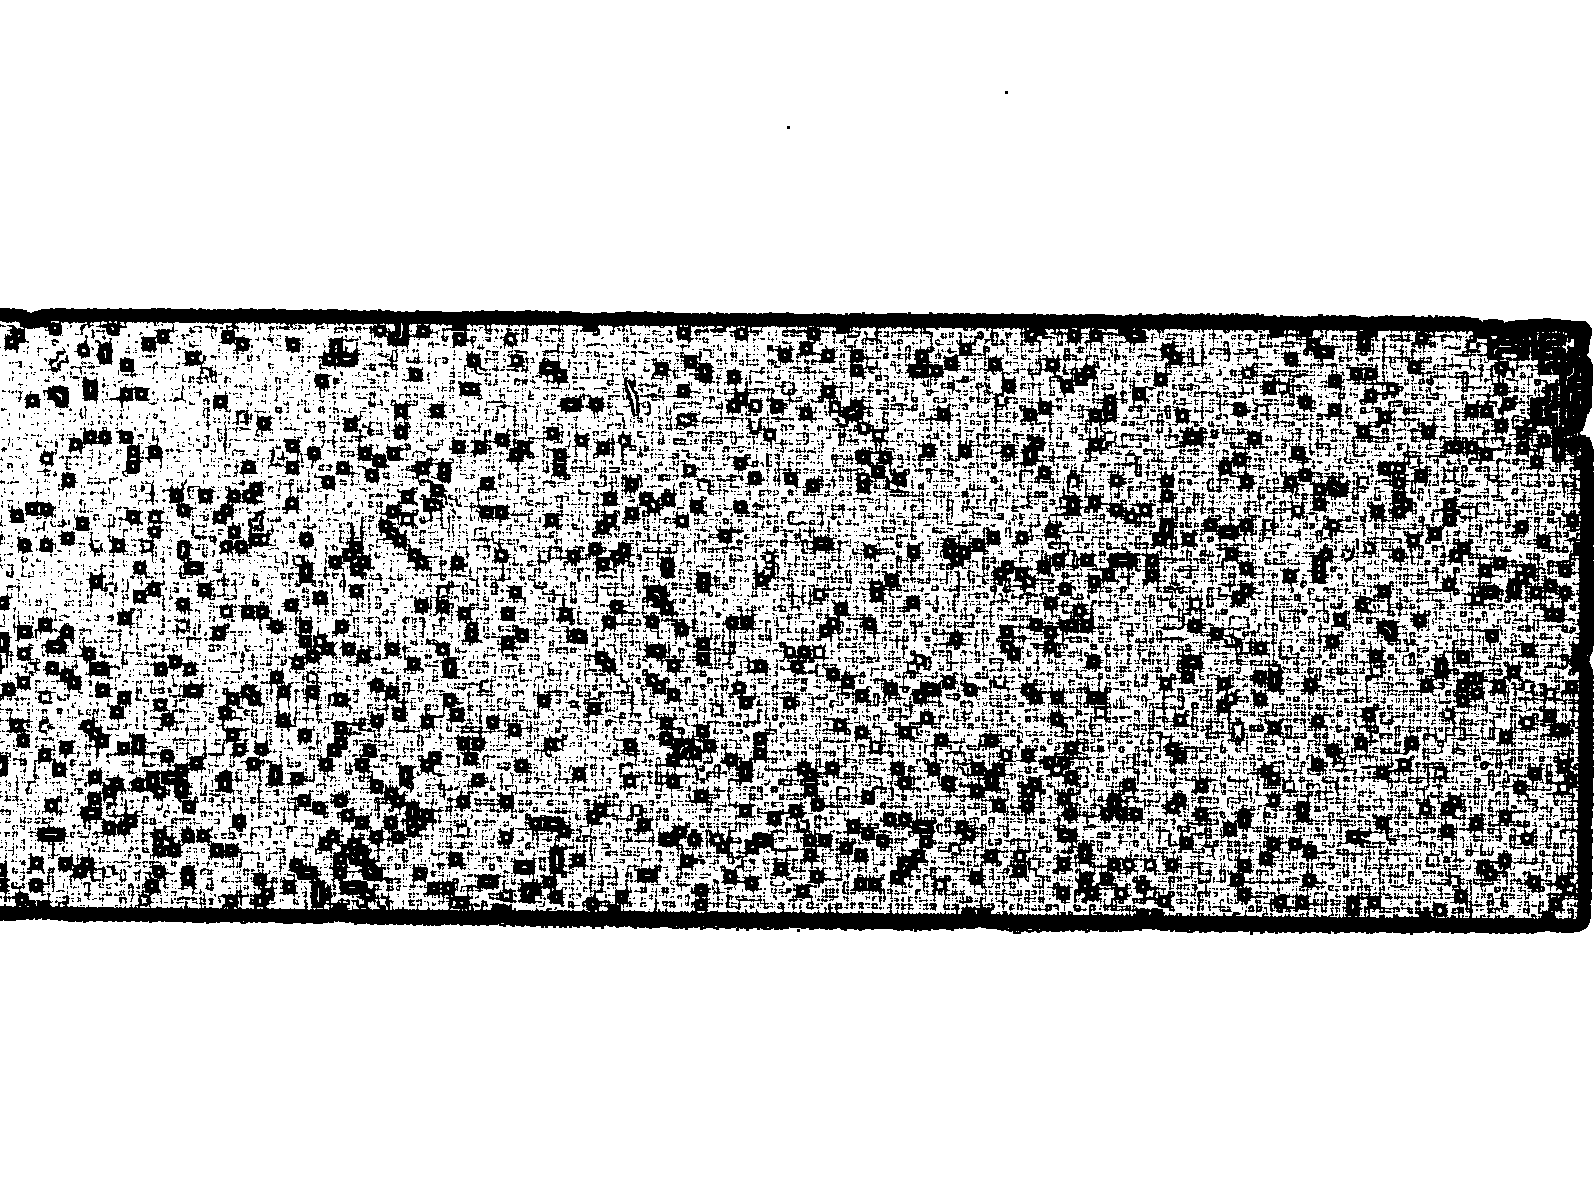

In [0]:
lapl = m.outputs

class controledpool():
    def __init__(self, filter_shape, stride):
        self.filter_shape = (filter_shape, filter_shape)
        self.stride = stride
        self.input = []
        pass

    def __call__(self, input, k):
        self.input.append(input)
        self.shape = self.input[0].shape
        print(self.shape)
        self.out_shape = floor((self.shape[0] - self.filter_shape[0])/self.stride) + 1
        self.out_shape2 = floor((self.shape[1] - self.filter_shape[0])/self.stride) + 1
        self.outputs = []
        
        for value in self.input:
            output = np.empty((self.out_shape, self.out_shape2), dtype=float)
            for y in range(0, output.shape[1], self.stride):
                for x in range(0, output.shape[0], self.stride):
                    max = np.max(value[x:(x + self.filter_shape[0]), y:(y + self.filter_shape[0])])
                    min = np.min(value[x:(x + self.filter_shape[0]), y:(y + self.filter_shape[0])])
                    avg = np.mean(value[x:(x + self.filter_shape[0]), y:(y + self.filter_shape[0])])
                    #output[x, y] = np.mean(value[x:(x + self.filter_shape[0]), y:(y + self.filter_shape[0])])
                    
                    if (max - min) > (avg)/k:
                        output[x, y] = 0
                    else:
                        output[x, y] = 255
            self.outputs.append(output)
        self.outputs = self.outputs[0]
        pass
    
    def train(self):  
        pass
    
    

test = controledpool(3, 1)
test(lapl, 10)

lapl7 = test.outputs
cv2_imshow(lapl7)



(1194, 1594)


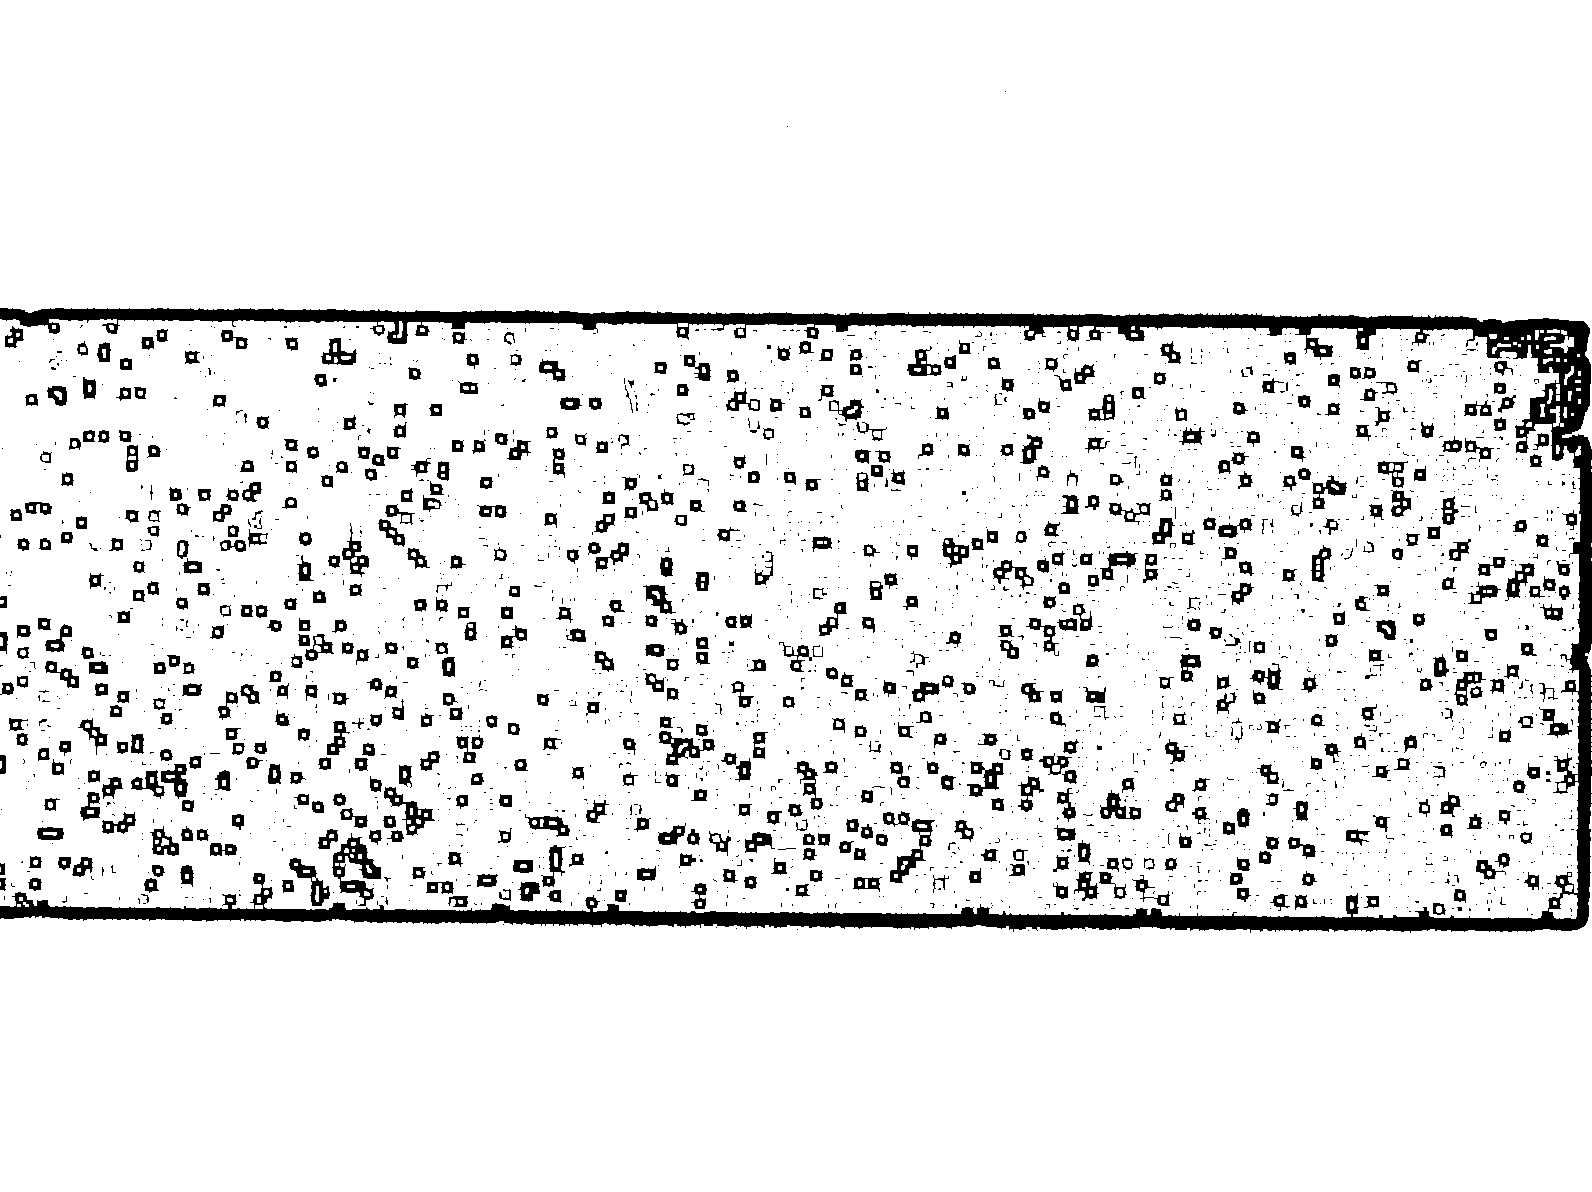

In [0]:
lapl = lapl7
p = maxPool2d(3, 1)
p(lapl)
lapl = p.outputs

cv2_imshow(lapl)

lapl8 = lapl

(1192, 1592)


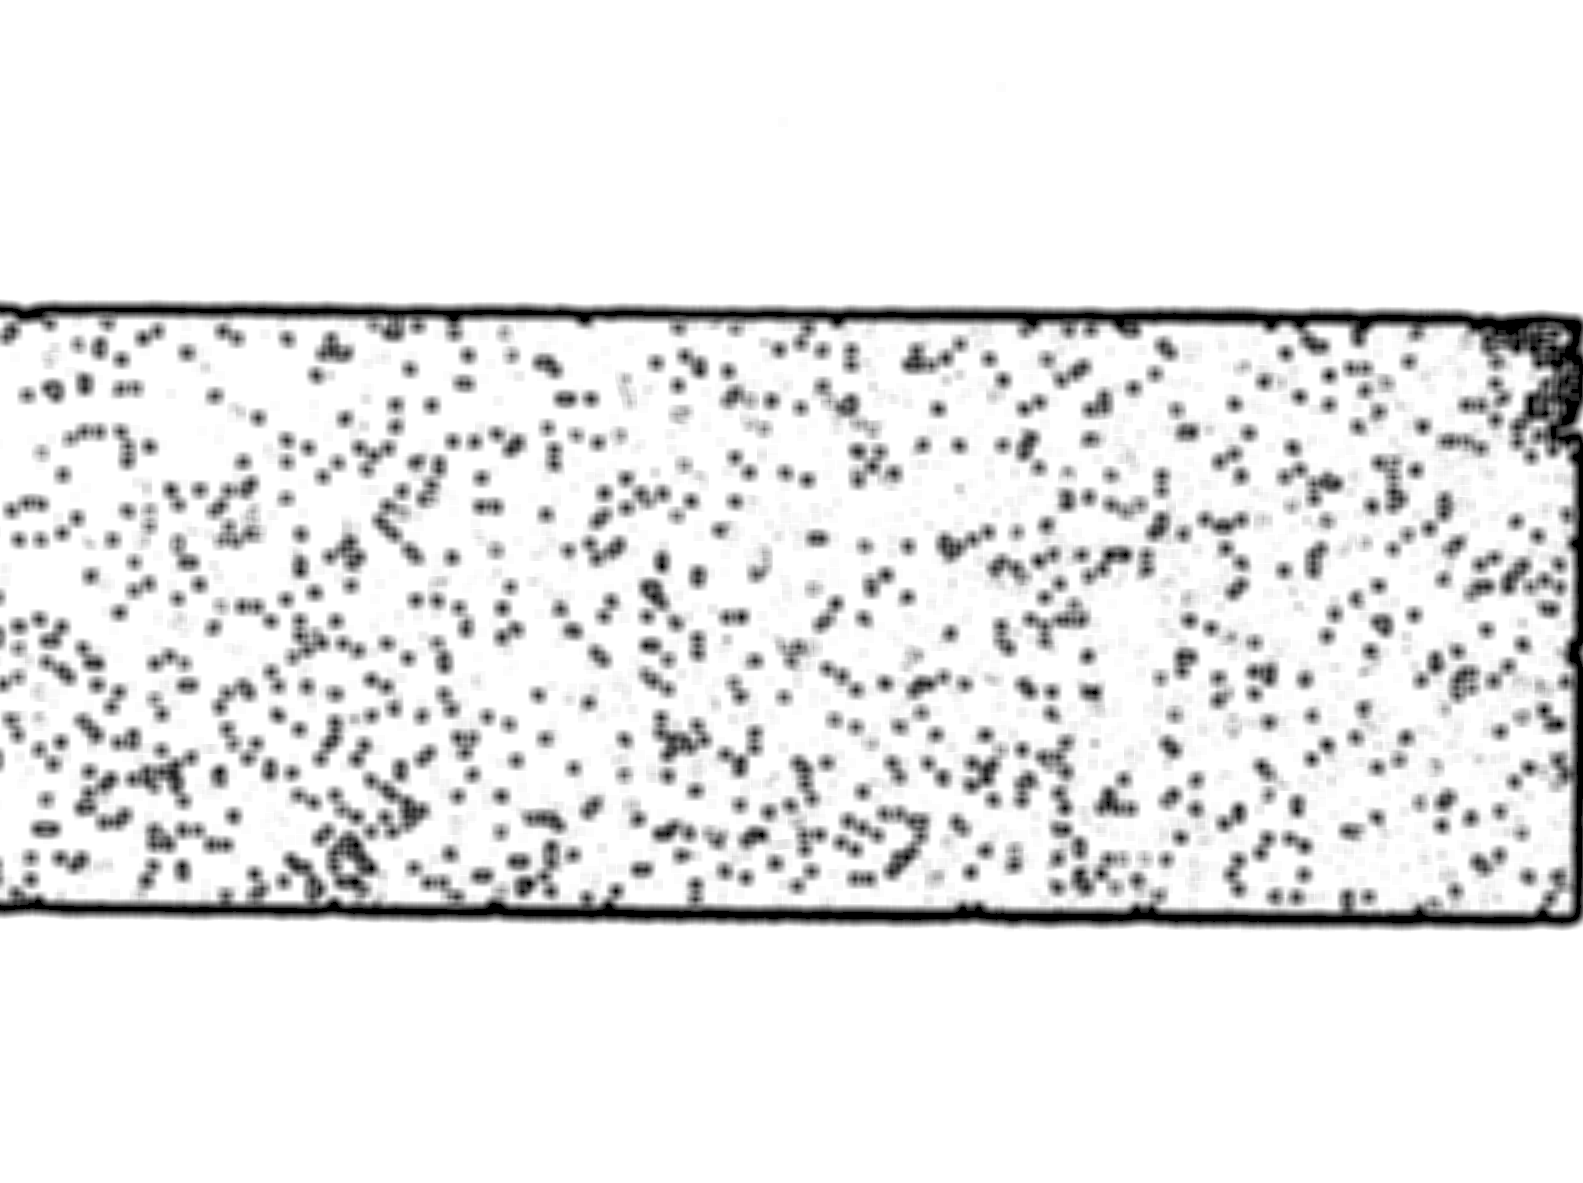

(1183, 1583) 20223


In [0]:
class avgPool3d():
    def __init__(self, filter_shape, stride):
        self.filter_shape = (filter_shape, filter_shape)
        self.stride = stride
        self.input = []
        self.count = 0
        pass

    def __call__(self, input):
        #self.count = 0
        self.input.append(input)
        self.shape = self.input[0].shape
        print(self.shape)
        self.out_shape = floor((self.shape[0] - self.filter_shape[0])/self.stride) + 1
        self.out_shape2 = floor((self.shape[1] - self.filter_shape[0])/self.stride) + 1
        self.outputs = []
        
        for value in self.input:
            output = np.empty((self.out_shape, self.out_shape2), dtype=float)
            for y in range(0, output.shape[1], self.stride):
                for x in range(0, output.shape[0], self.stride):
                    #output[x, y] = np.max(value[x:(x + self.filter_shape[0]), y:(y + self.filter_shape[0])])
                    #output[x, y] = np.min(value[x:(x + self.filter_shape[0]), y:(y + self.filter_shape[0])])
                    
                    avg = np.mean(value[x:(x + self.filter_shape[0]), y:(y + self.filter_shape[0])])
                    if avg > (255/self.filter_shape[0]):
                        output[x, y] = avg
                        #value[x:(x + self.filter_shape[0]), y:(y + self.filter_shape[0])] = 255
                    else:
                        output[x, y] = 0
                        #value[x:(x + self.filter_shape[0]), y:(y + self.filter_shape[0])] = 0
                        self.count = self.count + 1
            self.outputs.append(output)
            #self.outputs.append(value)
        self.outputs = self.outputs[0]
        pass
    
    def train(self):  
        pass
    
lapl = lapl8
p = avgPool3d(10, 1)
p(lapl)
lapl = p.outputs
#lapl = p.input

cv2_imshow(lapl)
print(lapl.shape, p.count)

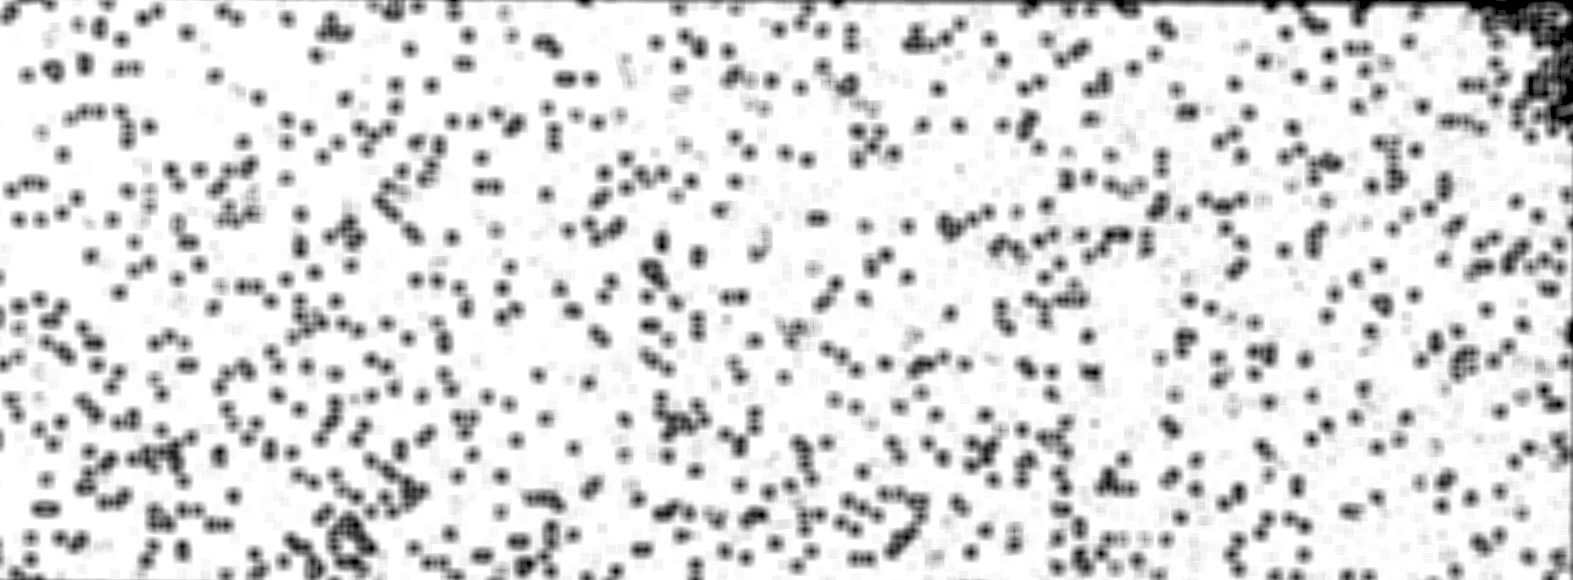

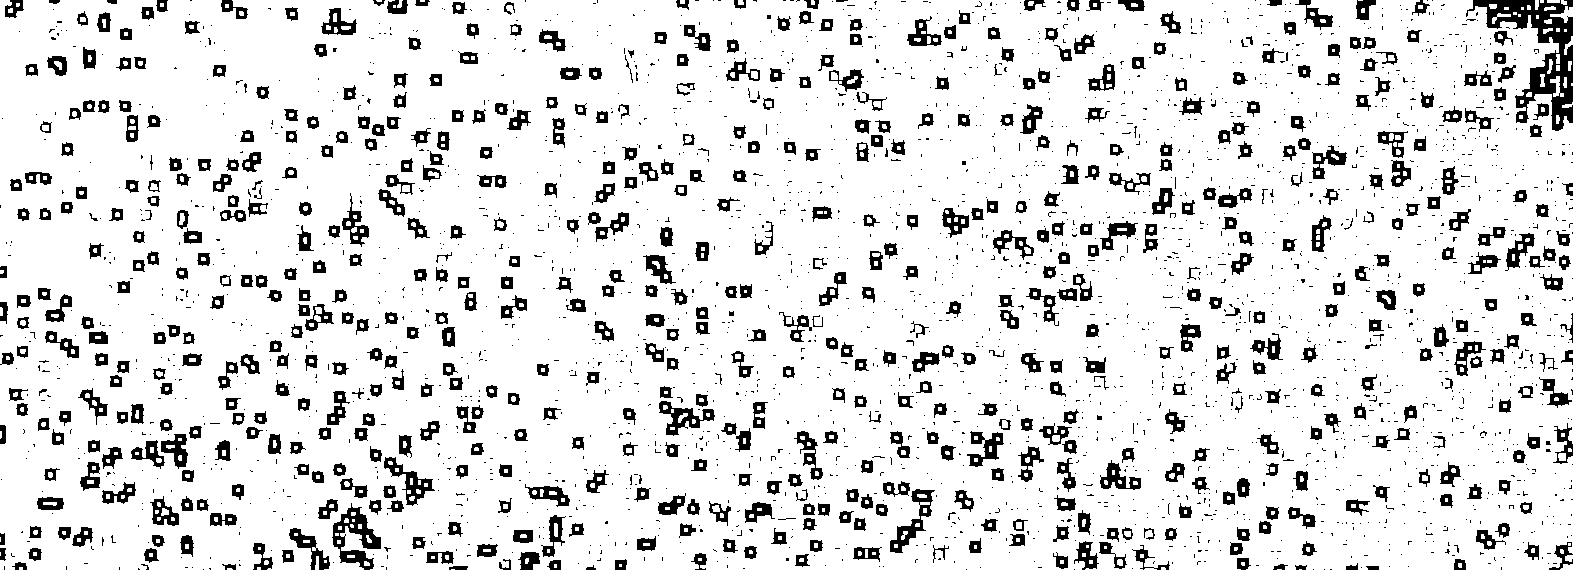

In [0]:
#cv2_imshow(lapl[320:900])
imgreduced = lapl[320:900]
imgreduced2 = lapl8[330:900]
#p(lapl)
#reducer = filters.laplace(lapl)
cv2_imshow(imgreduced[:, 0:1573])
imgreduced = imgreduced[:, 0:1573]
imgreduced2 = imgreduced2[:, 0:1573]
cv2_imshow(imgreduced2[:, 0:1573])
imt = imgreduced
#cv2_imshow(reducer[320:900]/lapl[320:900])

In [0]:
class avgPool8d():
    def __init__(self, filter_shape, stride):
        self.filter_shape = (filter_shape, filter_shape)
        self.stride = stride
        self.input = []
        self.count = 0
        pass

    def __call__(self, input):
        #self.count = 0
        self.input.append(input)
        self.shape = self.input[0].shape
        print(self.shape)
        self.out_shape = floor((self.shape[0] - self.filter_shape[0])/self.stride) + 1
        self.out_shape2 = floor((self.shape[1] - self.filter_shape[0])/self.stride) + 1
        self.outputs = []
        
        for value in self.input:
            output = np.empty((self.out_shape, self.out_shape2), dtype=float)
            for y in range(0, output.shape[1], self.stride):
                for x in range(0, output.shape[0], self.stride):
                    #output[x, y] = np.max(value[x:(x + self.filter_shape[0]), y:(y + self.filter_shape[0])])
                    #output[x, y] = np.min(value[x:(x + self.filter_shape[0]), y:(y + self.filter_shape[0])])
                    
                    sum = np.sum(value[x:(x + self.filter_shape[0]), y:(y + self.filter_shape[0])])
                    s255 = sum / 255
                    s0 = self.filter_shape[1]**2 - s255
                    
                    if not sum > ((self.filter_shape[1]**2)*255):
                        if s0 > s255: 
                            value[x:(x + self.filter_shape[0]), y:(y + self.filter_shape[0])] = 10000
                            self.count = self.count + 1                        
#                     if sum <= 255 * 60:
#                         #output[x, y] = 
#                         value[x:(x + self.filter_shape[0]), y:(y + self.filter_shape[0])] = 10000
#                         self.count = self.count + 1
            #self.outputs.append(output)
            self.outputs.append(value)
        self.outputs = self.outputs[0]
        pass
    
    def train(self):  
        pass

#imtx = imt
imtx = imgreduced2
iddk = avgPool8d(10, 1)
iddk(imtx)
g = iddk.outputs

#cv2_imshow(g)


In [0]:
print('dead pixels =', (iddk.count))

dead pixels = 1208


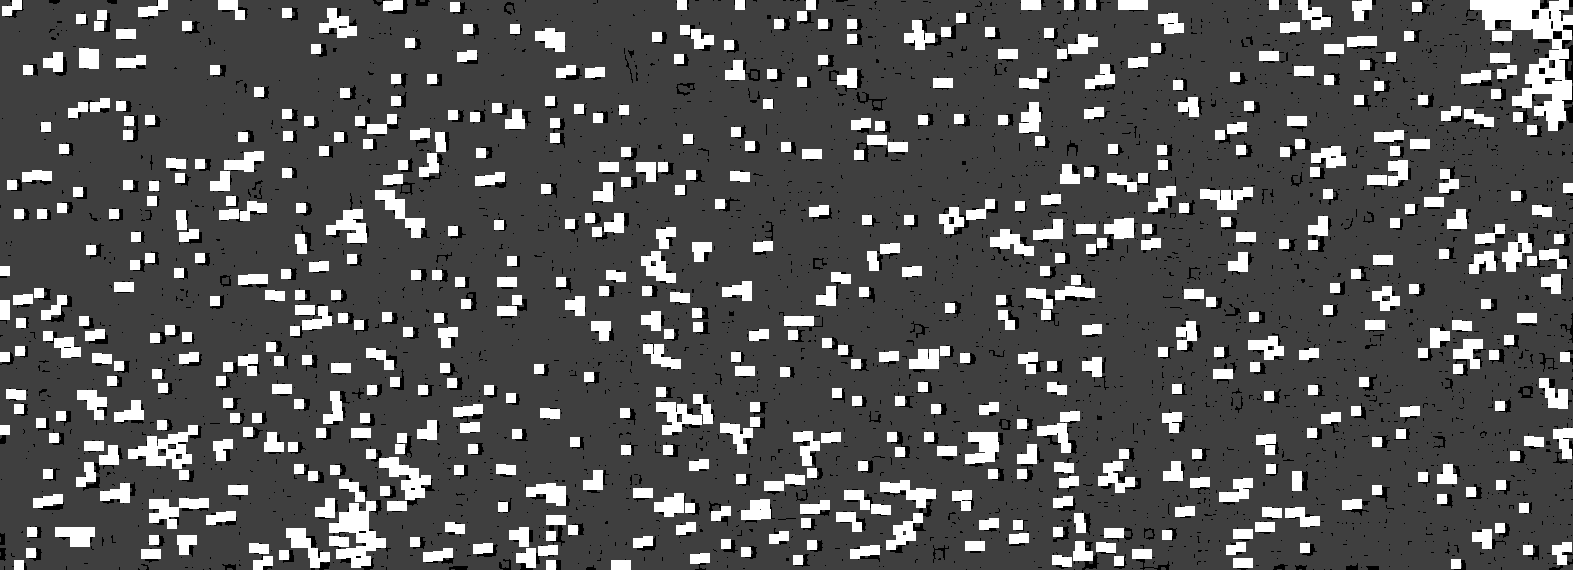

In [0]:
tester = g

tester[tester < 10000] = tester[tester < 10000]/4

cv2_imshow(g)
#cv2_imshow(imgreduced2[:, 0:1573])
#cv2_imshow(tester)

72
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


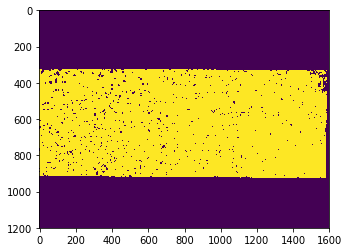

In [0]:
dead_threshold = int(max/3.5)
print(dead_threshold)
img[img > dead_threshold] = 255
img[img < dead_threshold] = 0
plt.imshow(img)
print(img)

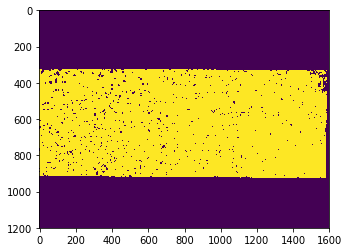

In [0]:
img_stor = img
plt.imshow(img)

In [0]:
crop_ytop = 0
crop_ybot = 0
for row_num, row in enumerate(img_stor):
    if np.sum(row) == 0:
        if row_num < 600:
            crop_ytop = crop_ytop + 1
        elif row_num > 600:
            crop_ybot = crop_ybot + 1

In [0]:
print (crop_ytop , crop_ybot)

323 274


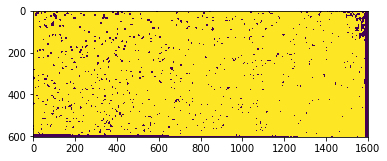

In [0]:
img_crop = img_stor[:][crop_ytop:-crop_ybot]
plt.imshow(img_crop)

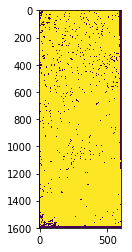

In [0]:
img_c_trans = img_crop.T
plt.imshow(img_c_trans)

crop_ytop = 0
crop_ybot = 0
for row_num, row in enumerate(img_c_trans):
    if np.sum(row) == 0:
        if row_num < 800:
            crop_ytop = crop_ytop + 1
        elif row_num > 800:
            crop_ybot = crop_ybot + 1

0 12


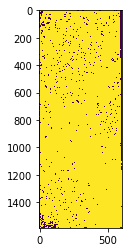

In [0]:
print (crop_ytop , crop_ybot)
img_c_trans = img_c_trans[:][crop_ytop:-crop_ybot]

plt.imshow(img_c_trans)

(603, 1588)
[[  0.   0.   0. ...   0.   0.   0.]
 [255.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


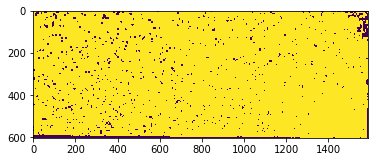

In [0]:
img_final = img_c_trans.T
plt.imshow(img_final)
print(img_final.shape)
print(img_final)

1052.204081632653
47393
967.204081632653
41719 9839
851.4081632653061 200.79591836734693
1158.861111111111 273.30555555555554


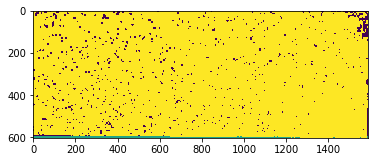

In [0]:
#print(img_final.shape[0]/45,img_final.shape[1]/45 )
dead_counter = (img_final == 0).sum()
print(dead_counter/(49))

img_test = img_final[:][:-3]
dead_count = (img_test == 0).sum()
print(dead_count)
print(dead_count/49)

(img_final[:800][-3:])[img_final[:800][-3:] == 0] = 150
#img_idk[img_idk == 0] = 150
(img_final[:800][-10:-3])[img_final[:800][-10:-3] == 0] = 150
plt.imshow(img_final)

img_test = img_final[:][:]
dead_count = (img_test == 0).sum()
potential_dead = (img_test == 150).sum()
print(dead_count, potential_dead)
print(dead_count/49, potential_dead/49)
print(dead_count/36, potential_dead/36)

In [0]:
#img_resize = cv2.resize(img_test, (246, 82))
img_resize = cv2.resize(img_test, (int(img_test.shape[1]/7), int(img_test.shape[0]/7)))

1261
1261


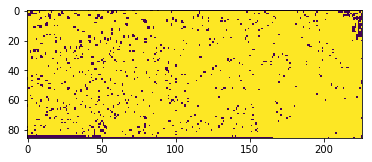

In [0]:
plt.imshow(img_resize)
img_resize[img_resize < 255] = 0
plt.imshow(img_resize)
dead_count = (img_resize == 0).sum()
print(dead_count)
print(dead_count)



In [0]:
print((603 * 1588)/36)

26599.0
